In [1]:
import csv
import glob
from collections import defaultdict

In [2]:
cluster_size =  defaultdict(int)

with open('/lustre/scratch117/cellgen/team218/gp7/Joe/MicroExonator/umap_NoRegressedAnnotations.tsv') as cell_metadata:
    
    reader = csv.DictReader(cell_metadata, delimiter="\t")
    
    for row in reader:
        cluster_size[row["leiden"]] += 1

In [3]:
cluster_comparison_weight = dict()
compare_clusters = dict()
cluster_total_weight = defaultdict(int)

with open('/lustre/scratch117/cellgen/team218/gp7/Joe/MicroExonator/run_metadata.tsv') as run_metadata:
    
    reader = csv.DictReader(run_metadata, delimiter="\t")
    
    for row in reader:
        
        A_clusters = row["A.cluster_names"].split(",")
        B_clusters = row["B.cluster_names"].split(",")
        
        total_cells_A = sum([ cluster_size[a] for a in A_clusters])
        total_cells_B = sum([ cluster_size[b] for b in B_clusters])
        
        compare_clusters[row["Compare_ID"]] = [A_clusters, B_clusters]
        
        for a in A_clusters:
            for b in B_clusters:
                
                if a!=b:
                    


                    try:
                        cluster_comparison_weight[(row["Compare_ID"], (a, b) )] = cluster_size[a]/(total_cells_A) + cluster_size[b]/( total_cells_B)
                        cluster_total_weight[(a, b)] += cluster_size[a]/(total_cells_A) + cluster_size[b]/( total_cells_B)
                    except ZeroDivisionError:
                        pass

#         for a in A_clusters:
#             cluster_comparison_weight[(row["Compare_ID"], a)] = cluster_size[a]/( total_cells_A)
#             cluster_total_weight[a] += cluster_size[a]/(total_cells_A)
            
#         for b in B_clusters:
#             cluster_comparison_weight[(row["Compare_ID"], b)] = cluster_size[b]/( total_cells_B) 
#             cluster_total_weight[b] += cluster_size[b]/( total_cells_B)

In [ ]:
cluster_comparison_weight

In [4]:

cluster_coord_dPSI = defaultdict(int)
coord_info = dict()
diff_coord_cluster = set([])

for file in glob.glob('/lustre/scratch117/cellgen/team218/gp7/Joe/MicroExonator/Whippet/Delta/Single_Cell/Sig_nodes/*.txt'):
    
    compare_ID = file.split("/")[-1].split(".")[0]
    
    with open(file) as res:
        
        reader = csv.DictReader(res, delimiter="\t")
        
        A_clusters, B_clusters = compare_clusters[compare_ID]
        
        total_cells_A = sum([ cluster_size[x] for x in A_clusters])
        
        for row in reader:
            
            coord_info[row['Coord']] = [row['Gene'], row['Node'], row['Strand'], row['Type']]
            
            if row['diff']=="TRUE":
            
                for a in A_clusters:
                    for b in B_clusters:
                        
                        if a !=b:

                            w = cluster_comparison_weight[(compare_ID, (a, b))]
                            cluster_coord_dPSI[((a,b), row['Coord'])] += (float(row['DeltaPsi.mean']) * w)/cluster_total_weight[(a,b)] #+ 0.01



    

KeyError: 'Total_brain_spinal_vs_Total_epiblast'

In [99]:
cluster_dist = defaultdict(int)

for key, Weighted_mean_dPSI in cluster_coord_dPSI.items():

    clusters, Coord = key
    A, B =  clusters
    
    cluster_dist[ tuple(sorted(clusters) )] += abs(Weighted_mean_dPSI)

In [100]:


splicing_net = ig.Graph()
splicing_net.add_vertices(42)

for clusters, dist in cluster_dist.items():
    
    a,b = map(int, list(clusters))
    splicing_net.add_edge(a, b, weight = 1/dist )
    
l = splicing_net.layout_fruchterman_reingold(weights=splicing_net.es['weight'])
#l = splicing_net.layout_kamada_kawai(weights=splicing_net.es['weight'])

#l = splicing_net.layout("fruchterman_reingold")


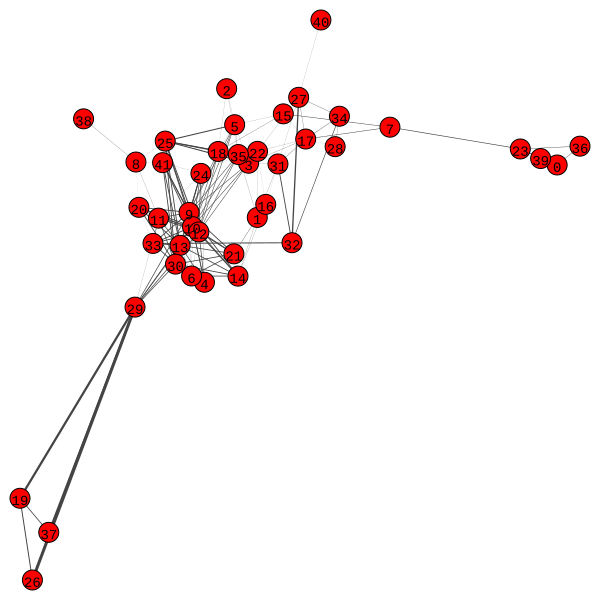

In [101]:
ig.plot(splicing_net, layout=l,  vertex_label=range(42), edge_width=ig.rescale([1/x for x in splicing_net.es["weight"]], out_range=(0.03, 3)))

In [27]:

with open("/lustre/scratch117/cellgen/team218/gp7/Joe/MicroExonator/Whippet/Delta/Single_Cell/Sig_nodes/weighted_pairwise_delta.tsv", "w") as out:
    
    out.write("\t".join(["Cluster.A", "Cluster.B", "Coord", "Gene", "Node", "Strand", "Type", "Weighted_mean_dPSI"]) + "\n" )

    for key, Weighted_mean_dPSI in cluster_coord_dPSI.items():
        
        Cluster_ID, Coord = key
        
        A, B =  Cluster_ID
        
        #if (Cluster_ID, Coord) in diff_coord_cluster:
        
        Gene, Node, Strand, Type = coord_info[Coord]

        out.write("\t".join([A, B, Coord, Gene, Node, Strand, Type, str(Weighted_mean_dPSI)]) + "\n" )


    
    
    

In [ ]:
cluster_dist

In [ ]:
cluster_dist.keys()

In [96]:
for a,b in cluster_dist.keys():
    print(a + "," + b )

19,29
12,25
10,25
25,9
3,35
20,8
16,22
29,37
16,21
1,21
14,16
1,14
0,36
0,23
2,5
15,18
27,40
27,31
14,21
2,35
18,5
24,4
10,13
17,27
16,31
15,17
17,3
11,24
25,8
19,26
17,34
17,31
31,32
23,36
23,39
26,29
17,28
6,9
0,39
11,20
23,7
20,33
32,34
13,21
21,8
21,30
10,21
21,6
12,21
13,14
14,8
14,30
10,14
14,6
12,14
1,31
11,12
10,12
30,9
10,30
12,30
10,6
12,6
13,9
12,13
12,3
10,3
3,9
12,5
10,5
5,9
12,35
10,35
35,9
12,18
10,18
18,9
38,8
11,33
28,34
24,41
11,29
15,5
13,4
13,24
13,8
13,41
11,13
13,20
13,25
13,33
13,29
4,8
24,8
41,8
11,8
33,8
29,8
30,4
24,30
30,8
30,41
11,30
20,30
25,30
30,33
29,30
10,4
10,24
10,8
10,41
10,11
10,20
10,33
10,29
4,6
24,6
6,8
41,6
11,6
20,6
25,6
33,6
29,6
12,4
12,24
12,8
12,41
12,20
12,33
12,29
18,22
22,3
22,27
17,7
3,31
35,5
18,24
22,35
17,22
1,35
15,7
1,22
22,31
13,30
10,9
24,35
3,5
26,37
19,37
27,32
32,33
25,41
13,6
30,6
1,16
25,3
25,5
25,35
18,25
18,2
27,34


In [59]:
import numpy as np


In [47]:
??.layout_kamada_kawai()

Object `.layout_kamada_kawai()` not found.


In [26]:
import igraph as ig

In [31]:
splicing_net.es['weight']


[0.011104431467646685,
 0.027858414162857878,
 0.027859719545718382,
 0.02582891534740647,
 0.2345486131863777,
 0.04314327840046773,
 0.013295589110144154,
 0.17283656741021153,
 0.17283656741021153,
 0.17283656741021153,
 0.17283656741021153,
 0.07914735543005194,
 0.4192201398657328,
 0.10373739979114473,
 0.241871776476702,
 0.4351991688523243,
 0.2287507425097916,
 0.1987367198419928,
 0.13120621627540624,
 0.2926262758843126,
 0.2031770522624946,
 0.027969959174921646,
 0.04684225436945424,
 0.06935089316518939,
 0.008254750416686748,
 0.23046366987937927,
 0.0572840909968242,
 2.7423662122931503,
 0.03893178250416335,
 0.013521167530186853,
 0.013521167530186853,
 0.013521167530186853,
 0.013521167530186853,
 0.013521167530186853,
 0.013521167530186853,
 0.013521167530186853,
 0.013521167530186853,
 0.013521167530186853,
 0.013521167530186853,
 0.013521167530186853,
 0.013521167530186853,
 0.03315989696474632,
 2.2354167003014083,
 0.1970274991175741,
 0.12276832864762961,
 0.10

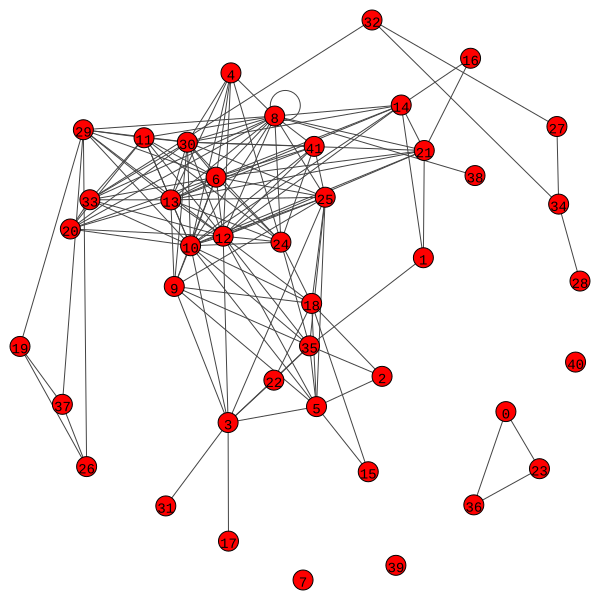

In [37]:
ig.plot(splicing_net, layout=l,  vertex_label=range(42))



In [32]:
ig.plot(splicing_net, 
     vertex.size=15, 
     vertex.label.dist=0.5, 
     vertex.label.cex=0.8,
     vertex.label.degree=-pi/2, 
     edge.width=splicing_net.es['weight'],
     layout=layout_with_kk,
     margin=-0.2)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-32-318e81274ddd>, line 2)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-39-3a8dd6a04ac5>, line 1)